<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%201%20%E2%80%93%20PyTorch%20Workflow/All_Together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Putting all together


In [47]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


**Setting the Device agnostic code**

In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [49]:
device

'cuda'

In [50]:
weight = 0.9
bias = 0.2

start = 0
end = 10
step =0.01

X = torch.arange(start , end ,step).unsqueeze(dim=1)
y = weight * X + bias

In [51]:
X[:10]

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])

In [52]:
y[:10]

tensor([[0.2000],
        [0.2090],
        [0.2180],
        [0.2270],
        [0.2360],
        [0.2450],
        [0.2540],
        [0.2630],
        [0.2720],
        [0.2810]])

In [53]:
X_split = int(0.8 * len(X))

In [54]:
y_split = int(0.8 * len(y))

In [55]:
X_train , y_train = X[:X_split] , y[:y_split]

In [56]:
X_test , y_test = X[X_split:] , y[y_split:]

In [57]:
len(X_train) ,len(X_test) , len(y_train) ,len(y_test)

(800, 200, 800, 200)

**Plotting The Data**

In [58]:
def plot_predictions(x_train,
                     x_test,
                     y_train,
                     y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(x_train , y_train , c="b" ,s=5 , label="Training Data")
  plt.scatter(x_test , y_test , c="g" ,s=5 ,label="Testing Data")

  if predictions is not None :
    plt.scatter(x_test , predictions , c="r",s=5,label="Predictions")

  plt.legend()



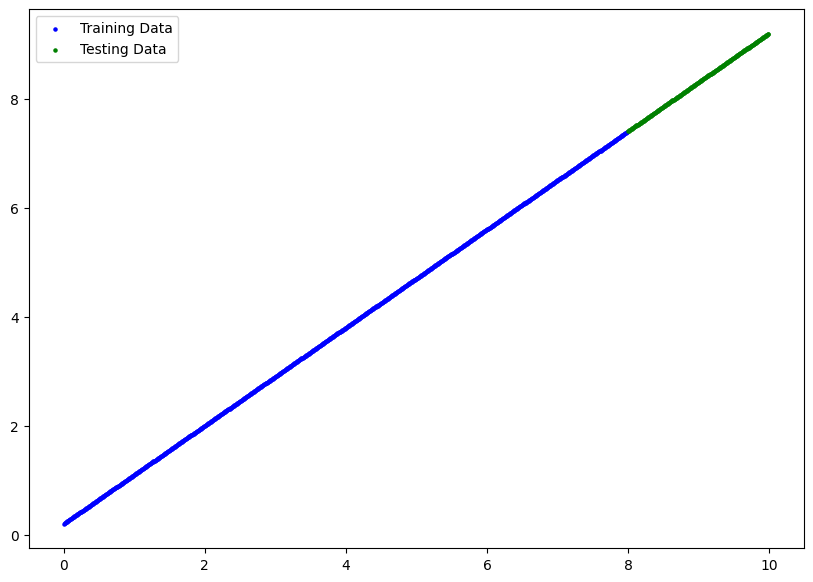

In [59]:
plot_predictions(X_train,X_test,y_train,y_test)

**Building The Model**

In [60]:
torch.manual_seed(42)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            dtype=torch.float,
                                            requires_grad=True))
    self.bias = nn.Parameter(torch.randn(1,
                                         dtype=torch.float,
                                         requires_grad=True))

  def forward(self , x : torch.tensor) -> torch.tensor:
    return weight * x + bias




In [61]:
model_1 = LinearRegressionModel()
model_1

LinearRegressionModel()

In [62]:
# creating model using pytorch Linear Model
torch.manual_seed(42)

class LinearModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self , x : torch.tensor) -> torch.tensor:
    return self.linear_layer(x)



In [63]:
model_1 = LinearModel2()
model_1 , model_1.state_dict()

(LinearModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [64]:
next(model_1.parameters()).device

device(type='cpu')

In [65]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

**Training and Testing The Model**

In [66]:
loss_fn = nn.L1Loss()
optm_fn = torch.optim.SGD(params = model_1.parameters(),
                          lr=0.01)

In [67]:
torch.manual_seed(42)

epochs = 400

#Putting Data on target Device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)



## Training LOOP
for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train)

  # loss
  loss = loss_fn(y_pred , y_train)

  #Optm zero
  optm_fn.zero_grad()

  #Backpropagation
  loss.backward()

  #optimizer step
  optm_fn.step()

## Testing LOOP
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred , y_test)

  if epoch % 10 == 0:
    print(f"Epoch : {epoch} || loss : {loss} || Test_Loss : {test_loss}")



Epoch : 0 || loss : 0.2782054543495178 || Test_Loss : 0.47440817952156067
Epoch : 10 || loss : 0.24631808698177338 || Test_Loss : 0.3575596809387207
Epoch : 20 || loss : 0.22965674102306366 || Test_Loss : 0.33279311656951904
Epoch : 30 || loss : 0.21299487352371216 || Test_Loss : 0.3093109130859375
Epoch : 40 || loss : 0.19633354246616364 || Test_Loss : 0.28454428911209106
Epoch : 50 || loss : 0.1796722114086151 || Test_Loss : 0.2597777247428894
Epoch : 60 || loss : 0.1630104035139084 || Test_Loss : 0.23501113057136536
Epoch : 70 || loss : 0.1463489979505539 || Test_Loss : 0.2115289270877838
Epoch : 80 || loss : 0.12968765199184418 || Test_Loss : 0.18676234781742096
Epoch : 90 || loss : 0.11302593350410461 || Test_Loss : 0.16199801862239838
Epoch : 100 || loss : 0.09636447578668594 || Test_Loss : 0.13852880895137787
Epoch : 110 || loss : 0.07973089069128036 || Test_Loss : 0.12036441266536713
Epoch : 120 || loss : 0.06485387682914734 || Test_Loss : 0.11252721399068832
Epoch : 130 || los

In [68]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9040]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2100], device='cuda:0'))])

In [69]:
# X_train = X_train.numpy().to(cpu)
# # X_test = (X_test.cpu()).numpy()
# # y_train = (y_train.cpu()).numpy()
# # y_test = (y_test.cpu()).numpy()
# # y_pred = (y_pred.cpu()).numpy()

In [70]:
model_1.eval()
with torch.inference_mode():
  y_pred = model_1(X_test)

y_pred[:10]

tensor([[7.4416],
        [7.4507],
        [7.4597],
        [7.4688],
        [7.4778],
        [7.4868],
        [7.4959],
        [7.5049],
        [7.5140],
        [7.5230]], device='cuda:0')

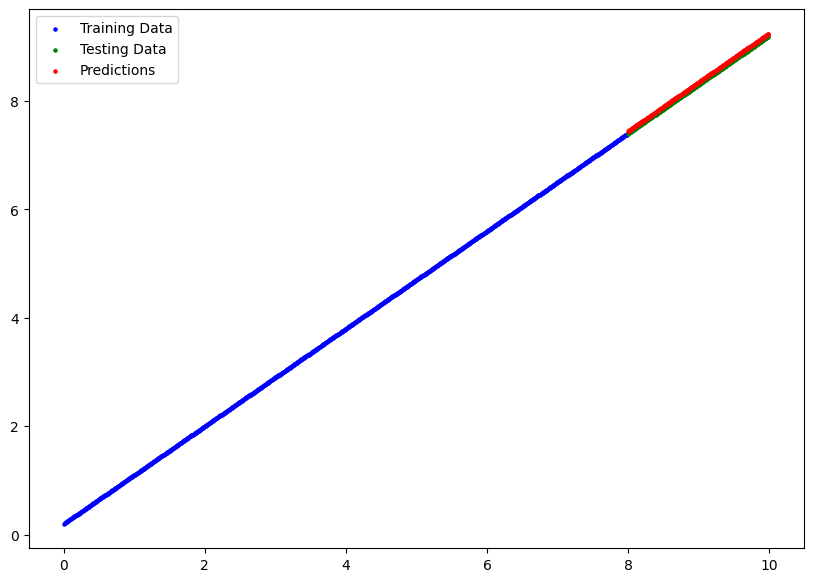

In [71]:
plot_predictions(X_train.cpu(),X_test.cpu(),y_train.cpu(),y_test.cpu(),predictions = y_pred.cpu())

**Saving and Loading The Model**

In [72]:
from pathlib import Path

In [73]:
model_path = Path("models")
model_path.mkdir(exist_ok=True , parents=True)


In [74]:
model_name = "All_Together_model_1.pth"
model_save_path = model_path/model_name

In [75]:
model_save_path

PosixPath('models/All_Together_model_1.pth')

In [76]:
torch.save(obj=model_1.state_dict(),
           f=model_save_path)

In [77]:
## Now our saved model

model_12 = LinearModel2()
model_12 ,model_12.state_dict()

(LinearModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [78]:
model_12.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [79]:
model_12.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9040]])),
             ('linear_layer.bias', tensor([0.2100]))])

In [80]:
model_12.eval()
with torch.inference_mode():
  y_pred_loaded = model_12(X_test.cpu())
y_pred_loaded[:10]

tensor([[7.4416],
        [7.4507],
        [7.4597],
        [7.4688],
        [7.4778],
        [7.4868],
        [7.4959],
        [7.5049],
        [7.5140],
        [7.5230]])

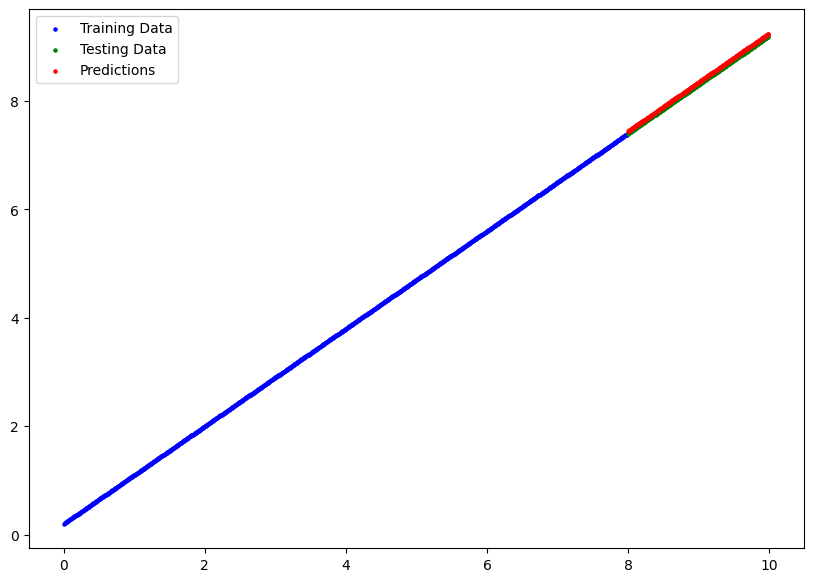

In [81]:
plot_predictions(X_train.cpu(),X_test.cpu(),y_train.cpu(),y_test.cpu(),predictions = y_pred_loaded.cpu())